In [1]:
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sys
import matplotlib 
from pandas import ExcelWriter
import datetime

import os
import xlwt
from xlwt.Workbook import *
from pandas import ExcelWriter
import xlsxwriter

import collections


In [2]:
sample = pd.ExcelFile('classificationVCnoPE.xlsx') #importing whole dataset


In [3]:
companies = pd.read_excel(sample, 0) #importing data page by page
rounds= pd.read_excel(sample, 1)
all_acquis = pd.read_excel(sample, 2)
all_ipos = pd.read_excel(sample, 3) 


In [4]:
#Clean blanks:
drop_indices = [] #indices to drop
for ind, value in enumerate(companies['Sector']):
    if str(value).casefold() == 'nan':
        drop_indices.append(companies['company_name'].index[ind])

    else:
        pass
companies=companies.drop(drop_indices)

#Clean blanks:
drop_indices_rounds = [] #indices to drop
for ind, value in enumerate(rounds['company_name']):
    if str(value).casefold() == 'nan':
        drop_indices_rounds.append(rounds['company_name'].index[ind])

    else:
        pass
rounds=rounds.drop(drop_indices_rounds)



In [289]:
#Counting number of VC backed companies by sector:
counters = collections.Counter(companies['Sector'])

#For each sector
#NON SPECIFIC
n_non = companies['Sector'].tolist().count('non')

#TRANSPORT
n_tev = companies['Sector'].tolist().count('tev') #evs
n_ten = companies['Sector'].tolist().count('ten') #evs network
n_tt = companies['Sector'].tolist().count('tt') #traditional
n_to = companies['Sector'].tolist().count('to') #other clean than ev
n_total_transp = n_ten + n_tev + n_tt + n_to

#SOLAR
n_sol = companies['Sector'].tolist().count('sol') #sol general
n_solc = companies['Sector'].tolist().count('solc') #sol centralised
n_sold = companies['Sector'].tolist().count('sold') #sol distributed
n_total_sol = n_sol + n_solc + n_sold  #total solar

n_sto = companies['Sector'].tolist().count('sto') #sto general
n_stoc = companies['Sector'].tolist().count('stoc') #sto centralised
n_stod = companies['Sector'].tolist().count('stod') #sto distributed
n_total_sto = n_sto + n_stoc + n_stod #total sto

#HEATING
n_hchp = companies['Sector'].tolist().count('hchp') #sol general
n_he = companies['Sector'].tolist().count('he') #sol centralised
n_ho = companies['Sector'].tolist().count('ho') #sol distributed
n_ht = companies['Sector'].tolist().count('ht') #sol distributed
n_total_h = n_he + n_ht + n_ho + n_hchp  #total solar

#TRADITIONAL
n_oil = companies['Sector'].tolist().count('oil') #oil
n_gas = companies['Sector'].tolist().count('gas') #gas
n_coal = companies['Sector'].tolist().count('coal') #coal
n_total_trad = n_oil + n_gas + n_coal #total traditional

#WIND
n_win = companies['Sector'].tolist().count('win') #wind
n_wind = companies['Sector'].tolist().count('win') #win cent
n_winc = companies['Sector'].tolist().count('win') #win dist
#NUCLEAR
n_nuc = companies['Sector'].tolist().count('nuc') #nuclear

#EFFICIENCY
n_eu = companies['Sector'].tolist().count('eu') #efficient unit
n_esg = companies['Sector'].tolist().count('esg') #efficient network
n_total_eff = n_eu + n_esg #total efficiency

#BIOENERGY/BIOFUELS
n_bio = companies['Sector'].tolist().count('bio') #bioenergy/biofuels

#OTHER CLEAN
n_mar = companies['Sector'].tolist().count('mar') #marine
n_was = companies['Sector'].tolist().count('was') #EfW
n_fh2 = companies['Sector'].tolist().count('fh2') #fuell cells and hydrogen
n_total_alter =  n_mar + n_was + n_fh2

n_sust = companies['Sector'].tolist().count('sust')
n_wat = companies['Sector'].tolist().count('wat')


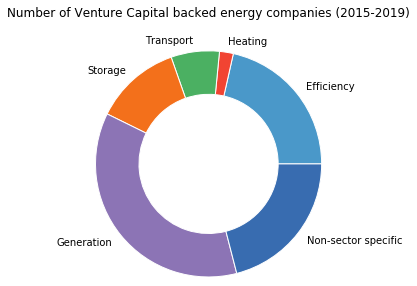

In [290]:
#PIE CHART NUMBER OF VENTURE BACKED COMPANIES 
group_names=['Efficiency','Heating','Transport','Storage','Generation','Non-sector specific']
group_size=[n_total_eff, n_total_h, n_total_transp, n_total_sto, n_total_sol+n_total_alter+n_bio+n_total_trad+n_nuc, n_non]
#subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
#subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c, d, e, f = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges, plt.cm.BuPu, plt.cm.Accent]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
plt.title('Number of Venture Capital backed energy companies (2015-2019)', y=1.15)
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6), f(0.6)] )
plt.setp( mypie, width=0.5, edgecolor='white')
 
# Second Ring (Inside)
#mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
#plt.setp( mypie2, width=0.4, edgecolor='white')
#plt.margins(0,0)
plt.savefig('numb_VC_backed_total.png', format='png', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')
# show it
plt.show()


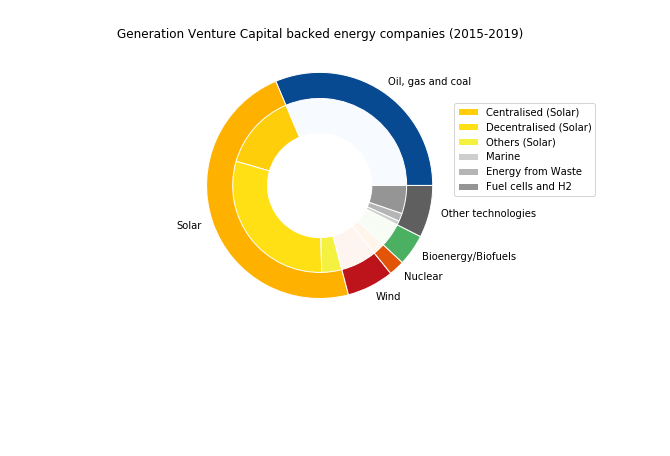

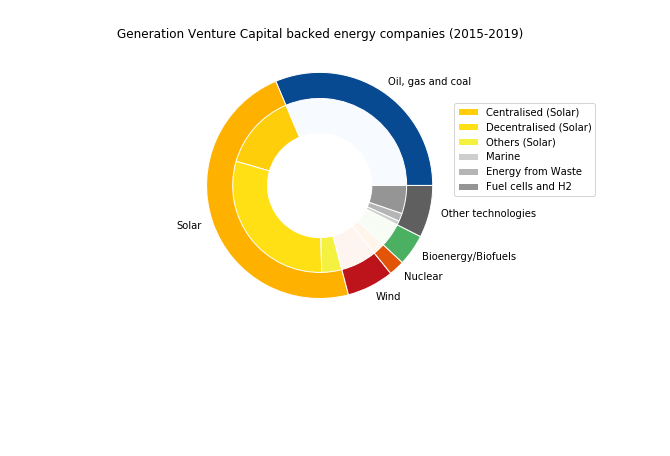

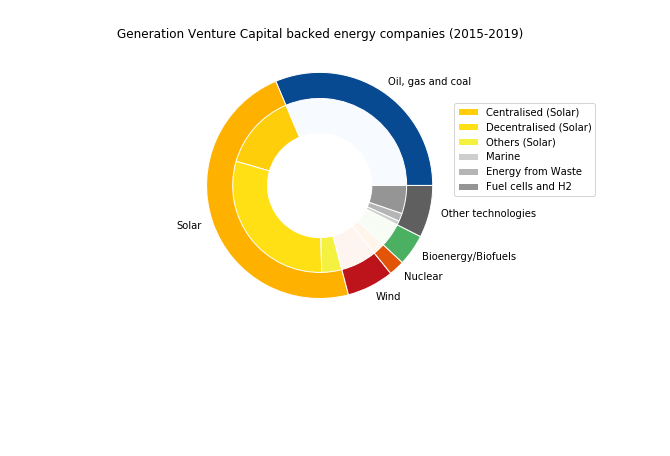

In [15]:

group_names=['Oil, gas and coal','Solar','Wind','Nuclear','Bioenergy/Biofuels','Other technologies']
group_size=[n_total_trad,n_total_sol,n_win, n_nuc, n_bio, n_total_alter]
subgroup_names=['', 'Centralised (Solar)', 'Decentralised (Solar)', 'Others (Solar)', '', '', '', 'Marine', 'Energy from Waste', 'Fuel cells and H2']
subgroup_size=[n_total_trad, n_solc, n_sold, n_sol, n_win+n_winc+n_wind, n_nuc, n_bio,  n_mar, n_was, n_fh2]
 
# Create colors
a, b, c, d, e, f = [plt.cm.Blues, plt.cm.Wistia, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Greys]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
plt.title('Generation Venture Capital backed energy companies (2015-2019)', y=1.15)
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.9), b(0.6), c(0.8), d(0.7), e(0.6), f(0.7)] )
plt.setp( mypie, width=0.5, edgecolor='white')
 
#Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels = subgroup_names, labeldistance=3, textprops=dict(color="w"), colors=[a(0), b(0.4), b(0.3), b(0.15), c(0), d(0), e(0), f(0.3), f(0.4), f(0.5)] )
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
#legend
plt.legend(loc=(0.9, 0.1))

inner_labels = [i for i in subgroup_names if str(i).casefold() is not '']
handles, labels = ax.get_legend_handles_labels()

lgd = ax.legend(handles[6:], [i for i in subgroup_names if str(i).casefold() is not ''], loc=(0.9, 0.45))
plt.savefig('GENnumb_VC_backed_total.png', format='png', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()



In [50]:
#Solar activity
#companies solar
#identify wich activyty
#relate to investment

inds_soft = []
inds_man = []
inds_ser = []
inds_oth = []

category = ['sol', 'solc', 'sold']
for indes, value in enumerate(companies['Sector']):
    if str(value).casefold() in category: #if solar
        
        if str(companies['Activity'].loc[companies['Sector'].index[indes]]).casefold() in ['man','ops']:
            inds_man.append(companies['Sector'].index[indes])
        
        elif str(companies['Activity'].loc[companies['Sector'].index[indes]]).casefold() in ['sof','soft']:
            inds_soft.append(companies['Sector'].index[indes])
            
        elif str(companies['Activity'].loc[companies['Sector'].index[indes]]).casefold() == 'ser':
            inds_ser.append(companies['Sector'].index[indes])
        
        elif str(companies['Activity'].loc[companies['Sector'].index[indes]]).casefold() == 'oth':
            inds_oth.append(companies['Sector'].index[indes])

numb_soft = len(inds_soft)
numb_man = len(inds_man)
numb_ser = len(inds_ser)
numb_oth = len(inds_oth)

investment_soft = 0
investment_man = 0
investment_ser = 0
investment_oth = 0

for i in inds_soft:
    for inds, value in enumerate(rounds['company_name']):      
        if str(companies['company_name'].loc[i]).casefold() == str(value).casefold():
            print(companies['company_name'].loc[i])
            if rounds['raised_amount_usd'].iloc[inds] > 0:
                investment_soft += rounds['raised_amount_usd'].iloc[inds]
    
investment_soft

Solar Monkey
Solar Monkey
Solar Monkey
Raycatch - Automatic AI diagnostics for Solar Energy
Raycatch - Automatic AI diagnostics for Solar Energy
Raycatch - Automatic AI diagnostics for Solar Energy
PVcase
ME SOLshare
RatedPower
UPowr
Enact Systems
Enact Systems
Solytic - Solar Monitoring & Data Analytics
Raptor Maps
Raptor Maps
ProjectEconomics
ProjectEconomics
Sunmapper
Solar Captus
Wave Solar


13639326.0

In [5]:
# Investment by sector
#Set to 0 different sectors

#Investing by sector:

#For each sector set to 0
#NON SPECIFIC
i_non = 0


#TRANSPORT
i_tev = 0 #evs
i_ten = 0 #evs network
i_tt = 0 #traditional
i_to = 0 #other clean than ev


#SOLAR
i_sol = 0 #sol general
i_solc = 0 #sol centralised
i_sold = 0 #sol distributed

#STORAGE
i_storage = 0 # total storage
#i_sto = 0 #sto general
#i_stoc = 0 #sto centralised
#i_stod = 0 #sto distributed


#HEATING #cooling not considered
i_hchp = 0 # chp dh or geo
i_he = 0 #electric
i_ht = 0 #traditional 


#TRADITIONAL
i_traditional = 0
#i_oil = 0 #oil
#i_gas = 0 #gas
#i_coal = 0 #coal


#WIND
i_win = 0 #wind
i_wind = 0 #wind dist
i_winc = 0 #wind centr


#NUCLEAR
i_nuc = 0 #nuclear

#EFFICIENCY
i_eu = 0 #efficient unit
i_esg = 0 #efficient network


#BIOENERGY/BIOFUELS
i_bio = 0 #bioenergy/biofuels

#OTHER CLEAN
i_mar = 0 #marine
i_was = 0 #EfW
i_fh2 = 0 #fuell cells and hydrogen



##################################################################################################

#CALCULATE INVESTMENT

for index_companies, name_companies in enumerate(companies['company_name']): #take companies names and assign index
    for index_rounds, name_rounds in enumerate(rounds['company_name']): #take rounds names and assign index
        
        if str(name_companies).casefold() == str(name_rounds).casefold(): # if a round name = company name
            
            #CHECK WHICH SUBSECTOR DOES IT BELONG TO AND ADD TO SUBSECTOR AMOUNT 
            
            #NON SECTOR SPECIFIC
            if str(companies['Sector'].iloc[index_companies]).casefold() == str('non').casefold():
                i_non += rounds['raised_amount_usd'].iloc[index_rounds]
            
            #TRANSPORT
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('tev').casefold():
                i_tev += rounds['raised_amount_usd'].iloc[index_rounds]
            
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('ten').casefold():
                i_ten += rounds['raised_amount_usd'].iloc[index_rounds]
            
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('tt').casefold():
                i_tt += rounds['raised_amount_usd'].iloc[index_rounds]
                
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('to').casefold():
                i_to += rounds['raised_amount_usd'].iloc[index_rounds]
                
            #SOLAR
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('sol').casefold():
                i_sol += rounds['raised_amount_usd'].iloc[index_rounds]
                
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('solc').casefold():
                i_solc += rounds['raised_amount_usd'].iloc[index_rounds]

            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('sold').casefold():
                i_sold += rounds['raised_amount_usd'].iloc[index_rounds]

            #STORAGE
            elif str(companies['Sector'].iloc[index_companies]).casefold() in ['sto','stoc','stod']:
                i_storage += rounds['raised_amount_usd'].iloc[index_rounds]            

            #HEATING
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('he').casefold():
                i_he += rounds['raised_amount_usd'].iloc[index_rounds]
                
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('hchp').casefold():
                i_hchp += rounds['raised_amount_usd'].iloc[index_rounds]
            
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('ht').casefold():
                i_ht += rounds['raised_amount_usd'].iloc[index_rounds]

            #TRADITIONAL
            elif str(companies['Sector'].iloc[index_companies]).casefold() in ['oil', 'gas', 'coal']:
                i_traditional += rounds['raised_amount_usd'].iloc[index_rounds]

            #WIND
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('win').casefold():
                i_win += rounds['raised_amount_usd'].iloc[index_rounds]
                
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('wind').casefold():
                i_wind += rounds['raised_amount_usd'].iloc[index_rounds]
                
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('winc').casefold():
                i_winc += rounds['raised_amount_usd'].iloc[index_rounds]

            #NUCLEAR
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('nuc').casefold():
                i_nuc += rounds['raised_amount_usd'].iloc[index_rounds]

            #EFF
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('eu').casefold():
                i_eu += rounds['raised_amount_usd'].iloc[index_rounds]   
                
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('esg').casefold():
                i_esg += rounds['raised_amount_usd'].iloc[index_rounds] 

            #BIO
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('bio').casefold():
                i_bio += rounds['raised_amount_usd'].iloc[index_rounds] 

            #OTHER CLEAN
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('mar').casefold():
                i_mar += rounds['raised_amount_usd'].iloc[index_rounds]
                
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('was').casefold():
                i_was += rounds['raised_amount_usd'].iloc[index_rounds]
                
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('fh2').casefold():
                i_fh2 += rounds['raised_amount_usd'].iloc[index_rounds]
            
            else: #these are companies in subsectors not considered such cooling, water, sust, etc... 
                pass
            
        else: # if no match
            pass
        
i_total_transp = i_ten + i_tev + i_tt + i_to #total transport
i_total_sol = i_sol + i_solc + i_sold  #total solar
i_total_sto = i_storage #total storage 
i_total_h = i_he + i_ht + i_hchp   #total heat
i_total_trad = i_traditional #total traditional
i_total_win = i_win + i_winc + i_wind
i_total_eff = i_eu + i_esg #total efficiency
i_total_alter =  i_mar + i_was + i_fh2

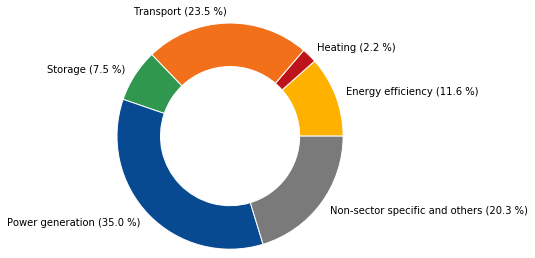

In [75]:
#PIE CHART INVESTMENT BY SECTOR IN VENTURE BACKED COMPANIES 
group_names=['Energy efficiency','Heating','Transport','Storage','Power generation','Non-sector specific and others']

group_size=[i_total_eff, i_total_h, i_total_transp,i_total_sto, i_total_sol+i_total_alter+i_bio+i_total_trad+i_nuc+i_total_win, i_non]


sizes = [100*i/sum(group_size) for i in group_size]
labells=['%s (%1.1f %%)'% (l, s) for l, s in zip(group_names, sizes)]
#subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
#subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c, d, e, f = [plt.cm.Wistia, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues, plt.cm.Greys]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
#plt.title('VC investment by sector in early energy ventures (2015-2019)', y=1.15)
mypie, _ = ax.pie(group_size, radius=1.3, labels=labells,  colors=[a(0.6), b(0.8), c(0.6), d(0.7), e(0.9), f(0.6)] )
plt.setp( mypie, width=0.5, edgecolor='white')
#plt.legend( loc = (0.75, -0.42), labels=['%s, %1.1f %%' % (l, s) for l, s in zip(group_names, sizes)]) 
# Second Ring (Inside)
#mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
#plt.setp( mypie2, width=0.4, edgecolor='white')
#plt.margins(0,0)
#plt.savefig('inv_general_sec.png', format='png', dpi=1000,  bbox_inches='tight')
# show it
plt.show()


In [76]:
sum(group_size)

3177516424.4459357

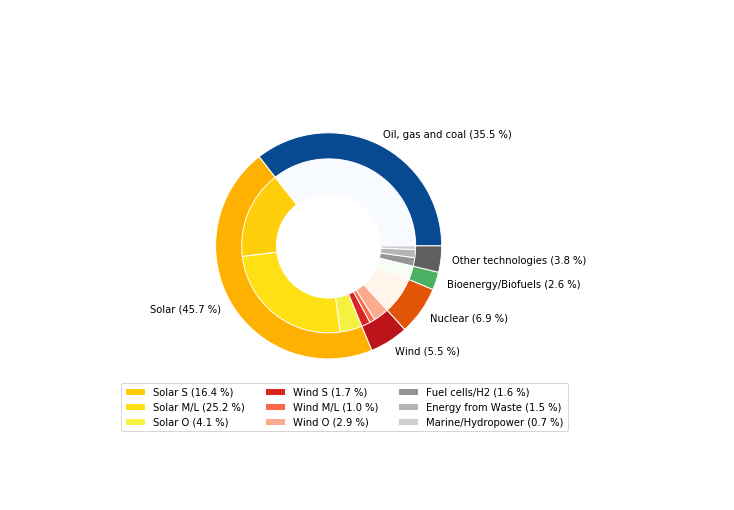

In [11]:
#INVESTMENT BY SUBSECTOR IN GENERATION - BREAK DOWN
group_names=['Oil, gas and coal','Solar','Wind','Nuclear','Bioenergy/Biofuels','Other technologies']
group_size=[i_total_trad,i_total_sol,i_total_win, i_nuc, i_bio, i_total_alter]
subgroup_names=['',  'Solar S','Solar M/L', 'Solar O','Wind S','Wind M/L',  'Wind O', '', '',   'Fuel cells/H2', 'Energy from Waste', 'Marine/Hydropower']
subgroup_size=[i_total_trad,  i_sold,i_solc, i_sol,  i_wind,i_winc, i_win, i_nuc, i_bio,  i_fh2, i_was, i_mar]
 
sizes1 = [100*i/sum(group_size) for i in group_size]
labells1=['%s (%1.1f %%)'% (l, s) for l, s in zip(group_names, sizes1)]    

sizes2 = [100*i/sum(subgroup_size) for i in subgroup_size]
labells2=['%s (%1.1f %%)'% (l, s) for l, s in zip(subgroup_names, sizes2)]    
    
# Create colors
a, b, c, d, e, f = [plt.cm.Blues, plt.cm.Wistia, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Greys]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
#plt.title('VC investment in the generation sector (2015-2019)', y=1.15)
mypie, _ = ax.pie(group_size, radius=1.3, labels=labells1, colors=[a(0.9), b(0.6), c(0.8), d(0.7), e(0.6), f(0.7)] )
plt.setp( mypie, width=0.5, edgecolor='white')
 
#Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels = labells2, labeldistance=3, textprops=dict(color="w"), colors=[a(0), b(0.4), b(0.3), b(0.15), c(0.7), c(0.5), c(0.3), d(0), e(0), f(0.5), f(0.4), f(0.3)] )
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
#legend
plt.legend(loc=(0.9, 0.1))

inner_labels = [i for i in subgroup_names if str(i).casefold() is not '']
handles, labels = ax.get_legend_handles_labels()

lgd = ax.legend(handles[7:13]+handles[15:], [i for i in labells2[1:7]+labells2[9:] if str(i).casefold() is not ''], loc=(-0.12, -0.35), ncol=3 )
plt.savefig('inv_generation_sec.png', format='png', dpi=1000, bbox_extra_artists=(lgd, ), bbox_inches='tight', pad_inches=0.25)

plt.show()



In [78]:
print(subgroup_size, sum(subgroup_size))

[395149635.05413336, 182443724.27520245, 279919284.812073, 45650126.55400976, 18374334.164711885, 11047536.26316115, 31852407.263161153, 77098166.0, 28410789.032721043, 17426703.82622951, 16769189.056603774, 7530000.0] 1111671896.302007


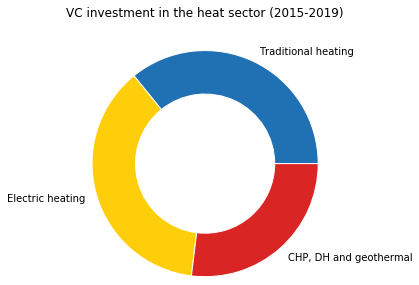

In [91]:
#INVESTMENT BY SUBSECTOR IN HEAT
group_names=['Traditional heating', 'Electric heating', 'CHP, DH and geothermal']
group_size=[i_ht,i_he,i_hchp]
 
# Create colors
a, b, c  = [plt.cm.Blues, plt.cm.Wistia, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
plt.title('VC investment in the heat sector (2015-2019)', y=1.15)
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.75), b(0.4), c(0.7)] )
plt.setp( mypie, width=0.5, edgecolor='white')

#plt.savefig('GENnumb_VC_backed_total.png', format='png', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()


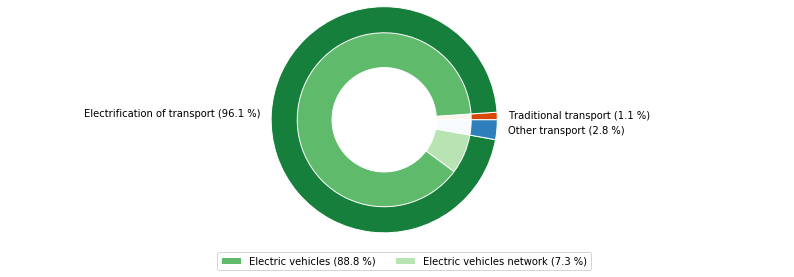

In [48]:
#INVESTMENT BY SUBSECTOR IN transport - BREAK DOWN
group_names=group_names=['Traditional transport', 'Electrification of transport', 'Other transport']
group_size=[i_tt, i_tev+i_ten, i_to]
subgroup_names=['', 'Electric vehicles', 'Electric vehicles network', '']
subgroup_size=[i_tt, i_tev, i_ten, i_to]
 
sizes1 = [100*i/sum(group_size) for i in group_size]
labells1=['%s (%1.1f %%)'% (l, s) for l, s in zip(group_names, sizes1)]    

sizes2 = [100*i/sum(subgroup_size) for i in subgroup_size]
labells2=['%s (%1.1f %%)'% (l, s) for l, s in zip(subgroup_names, sizes2)]    

# Create colors
a, b, c = [plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
#plt.title('VC investment in the transport sector (2015-2019)', y=1.15)
mypie, _ = ax.pie(group_size, radius=1.3, labels=labells1, colors=[a(0.75), b(0.8), c(0.7)])
plt.setp( mypie, width=0.5, edgecolor='white')
 
#Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels = labells2, labeldistance=3, textprops=dict(color="w"), colors=[a(0), b(0.55), b(0.3), c(0)] )
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
#legend
plt.legend(loc=(0.9, 0.1))

inner_labels = [i for i in subgroup_names if str(i).casefold() is not '']
handles, labels = ax.get_legend_handles_labels()

lgd = ax.legend(handles[4:6], [i for i in labells2[1:] if str(i).casefold() is not ''], loc=(-0, -0.19), ncol=3)
plt.savefig('inv_sec_tran.png', format='png', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight', pad_inches=2)

plt.show()



In [39]:
sum(subgroup_size)

745664211.798961

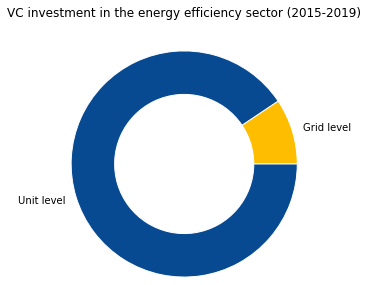

In [12]:
#INVESTMENT BY SUBSECTOR IN EFFICIENCY
group_names=['Grid level', 'Unit level']
group_size=[i_esg,i_eu]
 
# Create colors
a, b  = [plt.cm.Blues, plt.cm.Wistia]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
plt.title('VC investment in the energy efficiency sector (2015-2019)', y=1.15)
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[b(0.5),a(0.9), ] )
plt.setp( mypie, width=0.5, edgecolor='white')

#plt.savefig('GENnumb_VC_backed_total.png', format='png', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

In [13]:
# Investment by sector
#Set to 0 different sectors

#Investing by activity:

#For each activity set to 0
#NON SPECIFIC
i_soft_non, i_man_non, i_ser_non, i_oth_non = 0, 0, 0, 0

#TRANSPORT
i_soft_tran, i_man_tran, i_ser_tran, i_oth_tran = 0, 0, 0, 0

#SOLAR
i_soft_sol, i_man_sol, i_ser_sol, i_oth_sol = 0, 0, 0, 0

#STORAGE
i_soft_sto, i_man_sto, i_ser_sto, i_oth_sto = 0, 0, 0, 0


#HEATING #cooling not considered
i_soft_h, i_man_h, i_ser_h, i_oth_h = 0, 0, 0, 0

#TRADITIONAL
i_soft_trad, i_man_trad, i_ser_trad, i_oth_trad = 0, 0, 0, 0

#WIND
i_soft_win, i_man_win, i_ser_win, i_oth_win = 0, 0, 0, 0

#NUCLEAR
i_soft_nuc, i_man_nuc, i_ser_nuc, i_oth_nuc = 0, 0, 0, 0

#EFFICIENCY
i_soft_ef, i_man_ef, i_ser_ef, i_oth_ef = 0, 0, 0, 0

#BIOENERGY/BIOFUELS
i_soft_bio, i_man_bio, i_ser_bio, i_oth_bio = 0, 0, 0, 0

#OTHER CLEAN
i_soft_oth, i_man_oth, i_ser_oth, i_oth_oth = 0, 0, 0, 0

##################################################################################################

#CALCULATE INVESTMENT

for index_companies, name_companies in enumerate(companies['company_name']): #take companies names and assign index
    for index_rounds, name_rounds in enumerate(rounds['company_name']): #take rounds names and assign index
        
        if str(name_companies).casefold() == str(name_rounds).casefold(): # if a round name = company name
            
            #CHECK WHICH SUBSECTOR DOES IT BELONG TO AND ADD TO SUBSECTOR AMOUNT 
            
            #NON SECTOR SPECIFIC
            if str(companies['Sector'].iloc[index_companies]).casefold() == str('non').casefold():
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_non += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_non += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_non += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_non += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies])
                
                    
                      
            #TRANSPORT
            elif str(companies['Sector'].iloc[index_companies]).casefold() in ['tt','tev','ten','to']:
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_tran += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_tran += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_tran += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_tran += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies])
                
            #SOLAR
            elif str(companies['Sector'].iloc[index_companies]).casefold() in ['sol','solc', 'sold']:
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_sol += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_sol += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_sol += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_sol += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies])

            #STORAGE
            elif str(companies['Sector'].iloc[index_companies]).casefold() in ['sto','stoc','stod']:
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_sto += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_sto += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_sto += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_sto += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies])         

            #HEATING
            elif str(companies['Sector'].iloc[index_companies]).casefold() in ['he','ht','hchp']:
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_h += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_h += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_h += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_h += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies])
                    
                    
            #TRADITIONAL
            elif str(companies['Sector'].iloc[index_companies]).casefold() in ['oil', 'gas', 'coal']:
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_trad += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_trad += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_trad += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_trad += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies])

            #WIND
            elif str(companies['Sector'].iloc[index_companies]).casefold() in ['win', 'wind', 'winc']:
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_win += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_win += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_win += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_win += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies])

            #NUCLEAR
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('nuc').casefold():
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_nuc += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_nuc += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_nuc += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_nuc += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies])
                    
            #EFF
            elif str(companies['Sector'].iloc[index_companies]).casefold() in ['eu','esg']:
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_ef += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_ef += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_ef += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_ef += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies])
            #BIO
            elif str(companies['Sector'].iloc[index_companies]).casefold() == str('bio').casefold():
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_bio += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_bio += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_bio += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_bio += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies])

            #OTHER CLEAN
            elif str(companies['Sector'].iloc[index_companies]).casefold() in ['mar', 'was', 'fh2']:
                if str(companies['Activity'].iloc[index_companies]).casefold() == str('soft').casefold():
                    i_soft_oth += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('man').casefold():
                    i_man_oth += rounds['raised_amount_usd'].iloc[index_rounds]
                
                elif str(companies['Activity'].iloc[index_companies]).casefold() == str('ser').casefold():
                    i_ser_oth += rounds['raised_amount_usd'].iloc[index_rounds]
                    
                elif str(companies['Activity'].iloc[index_companies]).casefold() in ['oth', 'ops']:
                    i_oth_oth += rounds['raised_amount_usd'].iloc[index_rounds]
                else:
                    print(companies['company_name'].iloc[index_companies], 'A')
            
            else: #these are companies in subsectors not considered such cooling, water, sust, etc... 
                pass
            
        else: # if no match
            pass
i_total_soft = i_soft_bio + i_soft_ef + i_soft_h + i_soft_non + i_soft_nuc + i_soft_oth + i_soft_sol + i_soft_sto + i_soft_trad + i_soft_tran + i_soft_win
i_total_man = i_man_bio + i_man_ef + i_man_h + i_man_non + i_man_nuc + i_man_oth + i_man_sol + i_man_sto + i_man_trad + i_man_tran + i_man_win 
i_total_ser = i_ser_bio + i_ser_ef + i_ser_h + i_ser_non + i_ser_nuc + i_ser_oth + i_ser_sol + i_ser_sto + i_ser_trad + i_ser_tran + i_ser_win
i_total_oth = i_oth_bio + i_oth_ef + i_oth_h + i_oth_non + i_oth_nuc + i_oth_oth + i_oth_sol + i_oth_sto + i_oth_trad + i_oth_tran + i_oth_win

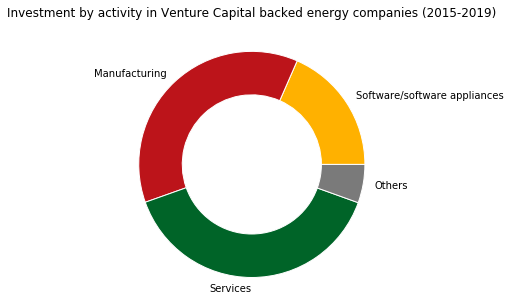

In [14]:
    #TOTAL VC INVESTMENT BY ACTIVITY

group_names=['Software/software appliances','Manufacturing','Services','Others']
group_size=[i_total_soft, i_total_man, i_total_ser,i_total_oth]
 
# Create colors
a, b, c, d = [plt.cm.Wistia, plt.cm.Reds, plt.cm.Blues, plt.cm.Greens]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
plt.title('Investment by activity in Venture Capital backed energy companies (2015-2019)', y=1.15)
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.8), e(0.9), f(0.6)] )
plt.setp( mypie, width=0.5, edgecolor='white')
 
# Second Ring (Inside)
#mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
#plt.setp( mypie2, width=0.4, edgecolor='white')
#plt.margins(0,0)
#plt.savefig('numb_VC_backed_total.png', format='png', dpi=1000,  bbox_inches='tight')
# show it
plt.show()


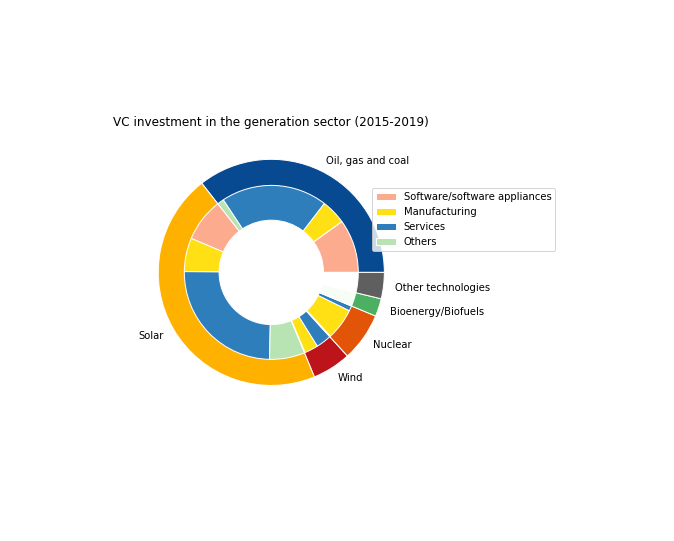

In [223]:
#INVESTMENT BY ACTIVITY IN GENERATION - BREAK DOWN
group_names=['Oil, gas and coal','Solar','Wind','Nuclear','Bioenergy/Biofuels','Other technologies']
group_size=[i_total_trad,i_total_sol,i_total_win, i_nuc, i_bio, i_total_alter]
subgroup_names=['Software/software appliances','Manufacturing','Services','Others', 'S','M','s','o','S','M','s','o','S','M','s','o','','']
#with bio energy
#subgroup_size=[i_soft_trad,i_man_trad,i_ser_trad,i_oth_trad, i_soft_sol, i_man_sol, i_ser_sol, i_oth_sol, i_soft_win, i_man_win, i_ser_win, i_oth_win,i_soft_nuc, i_man_nuc, i_ser_nuc, i_oth_nuc, i_soft_bio, i_man_bio, i_ser_bio, i_oth_bio, i_total_alter ]
#without bio
subgroup_size=[i_soft_trad,i_man_trad,i_ser_trad,i_oth_trad, i_soft_sol, i_man_sol, i_ser_sol, i_oth_sol, i_soft_win, i_man_win, i_ser_win, i_oth_win,i_soft_nuc, i_man_nuc, i_ser_nuc, i_oth_nuc, i_bio, i_total_alter ]
 
# Create colors
a, b, c, d, e, f = [plt.cm.Blues, plt.cm.Wistia, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Greys]
sof, man, ser, oth = [ plt.cm.Reds, plt.cm.Wistia,plt.cm.Blues, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
plt.title('VC investment in the generation sector (2015-2019)', y=1.15)
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.9), b(0.6), c(0.8), d(0.7), e(0.6), f(0.7)] )
plt.setp( mypie, width=0.5, edgecolor='white')
 
#Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels = subgroup_names, labeldistance=3, textprops=dict(color="w"), colors=[sof(0.3), man(0.3), ser(0.7), oth(0.3), sof(0.3), man(0.3), ser(0.7), oth(0.3), sof(0.3), man(0.3), ser(0.7), oth(0.3), sof(0.3), man(0.3), ser(0.7), oth(0.3), e(0), f(0)] )
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
#legend
plt.legend(loc=(0.9, 0.1))

inner_labels = [i for i in subgroup_names if str(i).casefold() is not '']
handles, labels = ax.get_legend_handles_labels()

lgd = ax.legend(handles[6:10], [i for i in subgroup_names if str(i).casefold() is not ''], loc=(0.8, 0.6))
#plt.savefig('GENnumb_VC_backed_total.png', format='png', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()


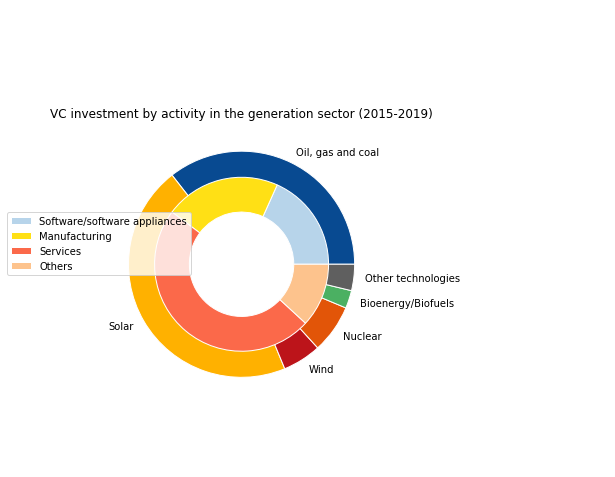

In [216]:
#INVESTMENT BY ACTIVITY IN GENERATION - BREAK DOWN
group_names=['Oil, gas and coal','Solar','Wind','Nuclear','Bioenergy/Biofuels','Other technologies']
group_size=[i_total_trad,i_total_sol,i_total_win, i_nuc, i_bio, i_total_alter]
subgroup_names=['Software/software appliances','Manufacturing','Services','Others']
subgroup_size=[i_soft_trad+ i_soft_sol+i_soft_win+i_soft_nuc+i_soft_bio+i_soft_oth, i_man_sol+i_man_trad+i_man_win+i_man_nuc+i_man_bio+i_man_oth ,i_ser_trad+ i_ser_sol+i_ser_win+i_ser_nuc+i_ser_bio+i_ser_oth ,i_oth_trad+i_oth_sol+i_oth_win+i_oth_nuc+i_oth_bio+i_oth_oth  ]
 
# Create colors
a, b, c, d, e, f = [plt.cm.Blues, plt.cm.Wistia, plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Greys]
sof, man, ser, oth = [plt.cm.Blues, plt.cm.Wistia, plt.cm.Reds, plt.cm.Oranges]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
plt.title('VC investment by activity in the generation sector (2015-2019)', y=1.15)
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.9), b(0.6), c(0.8), d(0.7), e(0.6), f(0.7)] )
plt.setp( mypie, width=0.5, edgecolor='white')
 
#Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels = subgroup_names, labeldistance=3, textprops=dict(color="w"), colors=[sof(0.3), man(0.3), ser(0.5), oth(0.3)] )
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
#legend
plt.legend(loc=(0.9, 0.1))

inner_labels = [i for i in subgroup_names if str(i).casefold() is not '']
handles, labels = ax.get_legend_handles_labels()

lgd = ax.legend(handles[6:], [i for i in subgroup_names if str(i).casefold() is not ''], loc=(-0.2, 0.45))
#plt.savefig('GENnumb_VC_backed_total.png', format='png', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()


SyntaxError: invalid syntax (<ipython-input-15-d582b2bddfd4>, line 13)

In [39]:
i_mark, i_tof, i_ef, i_ops, i_dig, i_lif, i_pro, i_off, i_bun, i_fin,i_con, i_upf = np.zeros((12,), dtype=int)
biz = np.zeros((12*3,), dtype=int) # b2b, b2c, m

i_val_prop = [i_mark, i_tof, i_ef, i_ops, i_dig, i_lif, i_pro, i_off, i_bun, i_fin,i_con, i_upf]
val_prop = ['mar', 'tof', 'ef', 'ops', 'dig', 'lif', 'pro', 'ind', 'bun', 'fin', 'con', 'upf']


for number, valprop in enumerate(val_prop):
    for index_companies, name_companies in enumerate(companies['company_name']):
        if str(valprop).casefold() in str(companies['Val prop'].iloc[index_companies]).casefold():
            for index_rounds, name_rounds in enumerate(rounds['company_name']): #take rounds names and assign index
            
                if str(name_companies).casefold() == str(name_rounds).casefold(): # if a round name = company name
                    i_val_prop[number] += rounds['raised_amount_usd'].iloc[index_rounds]
                    if str(companies['Model'].iloc[index_companies]).casefold() == 'b':
                        biz[number*3] += rounds['raised_amount_usd'].iloc[index_rounds]
                    elif str(companies['Model'].iloc[index_companies]).casefold() == 'c':
                        biz[number*3+1] += rounds['raised_amount_usd'].iloc[index_rounds]
                    elif str(companies['Model'].iloc[index_companies]).casefold() in ['m','mp2p']:
                        biz[number*3+2] += rounds['raised_amount_usd'].iloc[index_rounds]
                    else:
                        pass
                else:
                    pass
        else:
            pass
[i_mark, i_tof, i_ef, i_ops, i_dig, i_lif, i_pro, i_off, i_bun, i_fin,i_con, i_upf] = i_val_prop

#Slicing for b2b, b2c and m/mp2p
b2b = biz[0:len(biz):3]
b2c = biz[1:len(biz):3]
market = biz[2:len(biz):3]


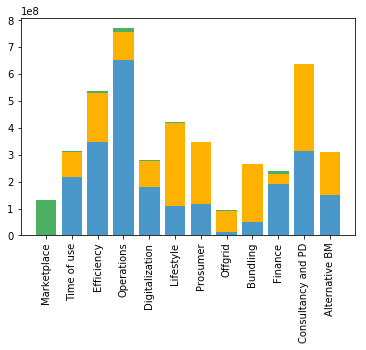

In [83]:
height = i_val_prop
bars = ['Marketplace','Time of use','Efficiency','Operations','Digitalization','Lifestyle','Prosumer','Offgrid','Bundling','Finance','Consultancy and PD','Alternative BM']
y_pos = np.arange(len(bars))

a, b, c = [plt.cm.Blues, plt.cm.Wistia, plt.cm.Greens]
# Create horizontal bars
pb2b = plt.bar(y_pos, b2b, color=a(0.6))
pb2c = plt.bar(y_pos, b2c, bottom=b2b, color=b(0.6))
pm = plt.bar(y_pos, market, bottom=b2c+b2b,  color=c(0.6))

# Create names on the y-axis
plt.xticks(y_pos,bars)
plt.xticks(rotation=90, )

# Show graphic
plt.show()

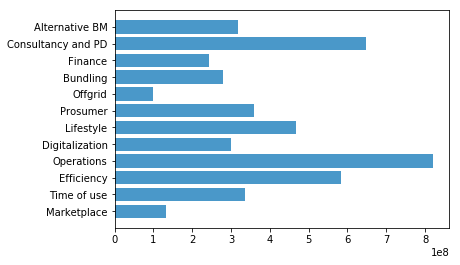

In [85]:
height = i_val_prop
bars = ['Marketplace','Time of use','Efficiency','Operations','Digitalization','Lifestyle','Prosumer','Offgrid','Bundling','Finance','Consultancy and PD','Alternative BM']
y_pos = np.arange(len(bars))

a, b, c = [plt.cm.Blues, plt.cm.Wistia, plt.cm.Greens]
# Create horizontal bars
pb2b = plt.barh(y_pos, height, color=a(0.6))


# Create names on the y-axis
plt.yticks(y_pos,bars)

# Show graphic
plt.show()